In [ ]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.pyplot import figure
from numpy import linalg as LA

In [ ]:
def print_info(old_interval, new_interval, iter, cnt):
    a, b = old_interval
    diff = count_diff(old_interval, new_interval)
    print(f"Левая граница: {a:15.5f}, правая граница: {b:15.5f}, итерация: {iter:2d}, вычисление функции: {cnt:2d}, отрезок изменился в {diff:15.5f} раз")

In [ ]:
def print_ans(x, iter, cnt, eps):
    print(f"Ответ: {x}. Итерации: {iter}. Вычисления функции: {cnt}. Эпсилон = {eps}")

In [ ]:
def count_diff(old, new):
    a_old, b_old = old
    a_new, b_new = new
    return (b_new - a_new) / (b_old - a_old)

In [ ]:
DEFAULT_EPS = 1e-4

In [ ]:
def dichotomy(f, eps=DEFAULT_EPS, print_i=False):
    delta = eps / 3
    def step(old_interval, cnt=0):
        a, b = old_interval
        mid = (a + b) / 2

        if b - a < eps:
            if print_i:
                print_ans(mid, cnt, cnt * 2, eps)

            return mid

        x1, x2 = mid - delta, mid + delta
        fx1, fx2 = f(x1), f(x2)

        if fx1 < fx2:
            new_interval = (a, x2)
        elif fx1 > fx2:
            new_interval = (x1, b)
        else:
            new_interval = (x1, x2)

        if print_i:
            print_info(old_interval, new_interval, cnt, cnt * 2 + 2)

        return step(new_interval, cnt+1)

    return step

In [ ]:
phi = (sqrt(5) - 1) / 2

def golden_ratio(f, eps=DEFAULT_EPS, print_i=False):
    def step(old_interval, f_x1=None, f_x2=None, cnt=0):
        a, b = old_interval

        if b - a < eps:
            mid = (a + b) / 2
            if print_i:
                print_ans(mid, cnt, cnt + 1, eps)

            return mid

        t = (b - a) * phi
        x1, x2 = b - t, a + t

        f_x1 = f_x1 if f_x1 else f(x1)
        f_x2 = f_x2 if f_x2 else f(x2)

        if f_x1 < f_x2:
            new_interval = (a, x2)
            args = [None, f_x1]
        else:
            new_interval = (x1, b)
            args = [f_x2, None]

        if print_i:
            print_info(old_interval, new_interval, cnt, cnt + 1)

        return step(new_interval, *args, cnt + 1)

    return step


In [ ]:
def evaluate_kth_fib(interval, eps):
    a, b = interval
    t = (b - a) / eps
    kth_fib, next_fib = [1], 1

    while kth_fib[-1] < t:
        kth_fib.append(next_fib)
        next_fib += kth_fib[-2]

    return kth_fib

def fibonacci(f, eps=DEFAULT_EPS, print_i=False):
    def step(old_interval, kth_fib=None, n=None, x1=None, x2=None, f_x1=None, f_x2=None, cnt=0):
        a, b = old_interval

        if not kth_fib:
            kth_fib = evaluate_kth_fib(old_interval, eps)
            n = len(kth_fib) - 1
            x1 = a + kth_fib[n - 2] / kth_fib[n] * (b - a)
            x2 = a + kth_fib[n - 1] / kth_fib[n] * (b - a)
            f_x1, f_x2 = f(x1), f(x2)

        if n <= 2:
            mid = (a + b) / 2
            if (print_i):
                print_ans(mid, cnt, cnt + 1, eps)

            return mid

        n -= 1

        if f_x1 < f_x2:
            b, x2, f_x2 = x2, x1, f_x1
            x1 = a + kth_fib[n - 2] / kth_fib[n] * (b - a)
            f_x1 = f(x1)
        else:
            a, x1, f_x1 = x1, x2, f_x2
            x2 = a + kth_fib[n - 1] / kth_fib[n] * (b - a)
            f_x2 = f(x2)

        if (print_i):
            print_info(old_interval, (a, b), cnt, cnt + 1)

        return step((a, b), kth_fib, n, x1, x2, f_x1, f_x2, cnt + 1)

    return step

In [ ]:
epss = [1e-1, 1e-2, 1e-6, 1e-10, 1e-12]
f = lambda x : x ** 3 / 3 - x ** 2 / 2 - x - 1
interval = (1, 2)
ans_len = 139

for eps in epss:
    dich = dichotomy(f, eps, True)
    grat = golden_ratio(f, eps, True)
    fibb = fibonacci(f, eps, True)

    print("-" * ans_len)
    dich(interval)

    print("*" * ans_len)
    grat(interval)

    print("#" * ans_len)
    fibb(interval)

In [ ]:
def plot_graph(f, trace, repr, method):
    fig, ax = plt.subplots()

    x, y = np.mgrid[-8:10:1000j, -10:12:1000j]
    print(x)
    print(y)
    z = f(x, y)

    levels = [x ** 3 for x in range(8)]
    r = np.linspace(240, 166, 256) / 255.
    g = np.linspace(244, 188, 256) / 255.
    b = np.linspace(246, 203, 256) / 255.
    cmap = ListedColormap(np.vstack((r, g, b)).T)

    ax.contourf(x, y, z, levels = levels, cmap = cmap)
    cs = ax.contour(x, y, z, levels = levels, colors = "#ABBECC")
    ax.clabel(cs, colors = "#2618B1")

    ax.plot(trace[:, 0], trace[:, 1], '-og', linewidth=.5, ms=1.5)

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid()

    fig.set_figwidth(10)
    fig.set_figheight(12)

    plt.show()



In [ ]:
def stop(xk, x0, eps, derivative):
    return LA.norm(derivative(*xk)) ** 2 <= eps * LA.norm(derivative(*x0)) ** 2

def stop_soft(x_cur, x_prev, eps):
    return LA.norm(x_cur - x_prev) < eps

def linear_search(f):
    step = 1e-3
    right_border = step

    while f(0) >= f(right_border):
        right_border += step

    return right_border

def find_best_step(f, xk, method, derivative):
    g = lambda step: f(*(xk - step * derivative(*xk)))
    interval = 0, linear_search(g)
    return method(g)(interval)

def gradient_descent(f, derivative, method, n=2, iteration=10_000, eps=1e-10, step=None):
    xk = x0 = np.zeros(n) + 100000
    trace = [xk]

    for _ in range(iteration):
        lr = step if step else find_best_step(f, xk, method, derivative)
        x_prev = xk
        xk = xk - lr * derivative(*xk)
        trace.append(xk)

        if stop_soft(xk, x_prev, eps):
            break

    return xk, np.asarray(trace)


Вычисляю для 5 * (y - x) ^ 2 + (1 - x) ^ 2:
	dichotomy:
		Ответ: [0.99902017 0.99882423], сошлось за 76 итераций


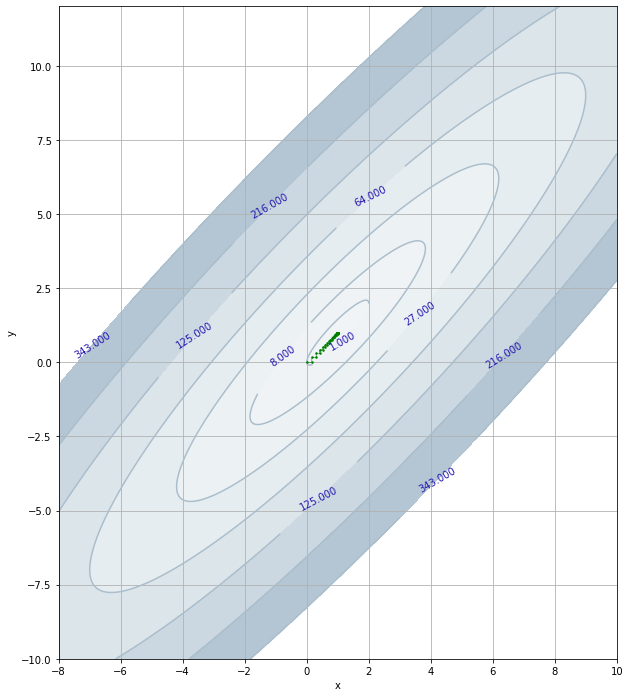


	golden_ratio:
		Ответ: [0.99901994 0.99882388], сошлось за 76 итераций


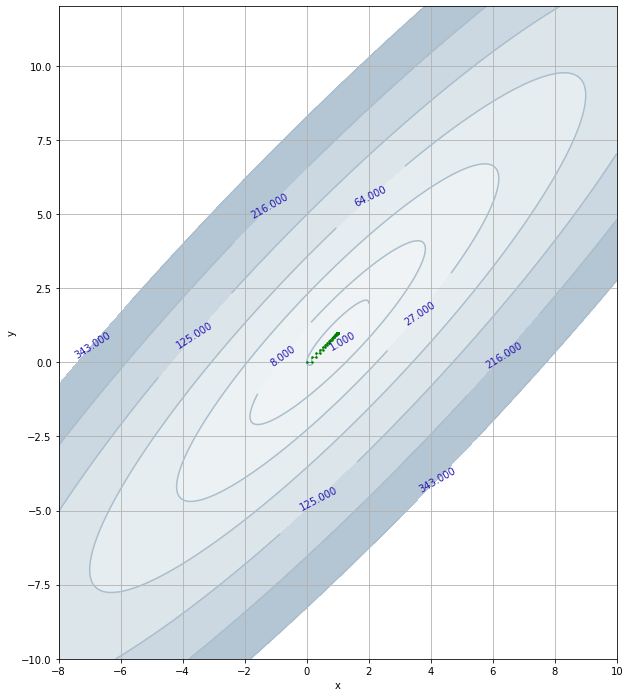


	fibbonacci:
		Ответ: [0.99902191 0.99882639], сошлось за 76 итераций


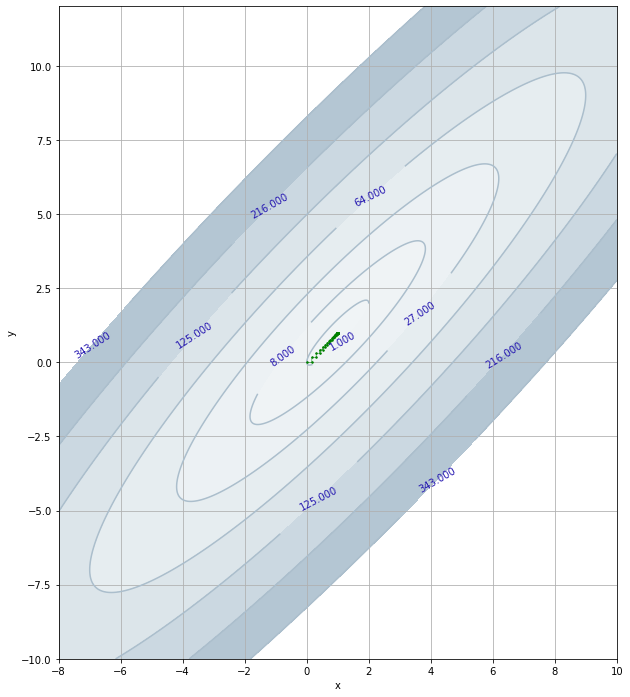


Вычисляю для (100 * (y - x ^ 2) ^ 2 + (1 - x) ^ 2):
	dichotomy:
		Ответ: [1.00183876 1.00368575], сошлось за 889 итераций


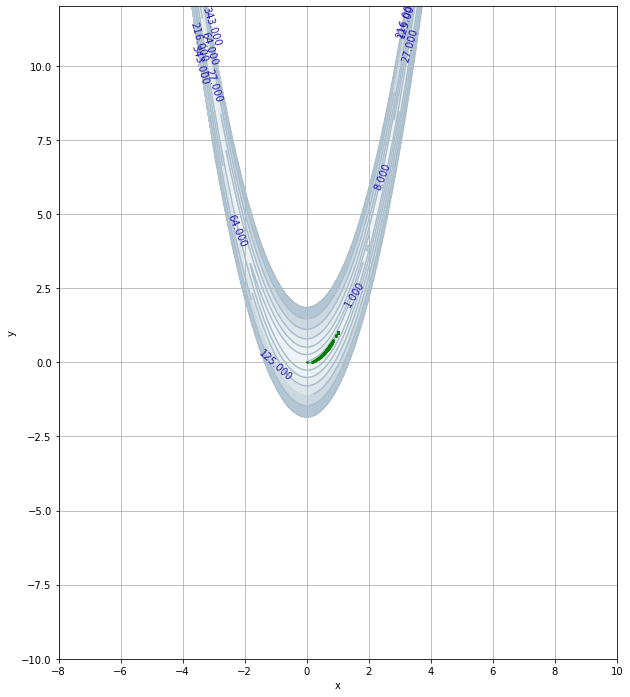


	golden_ratio:
		Ответ: [0.99820083 0.99639509], сошлось за 5548 итераций


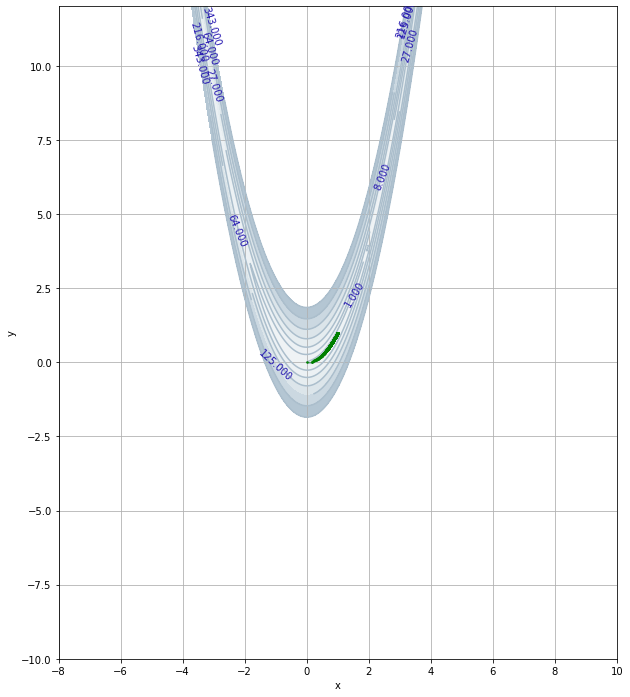


	fibbonacci:
		Ответ: [0.99819132 0.99637608], сошлось за 5244 итераций


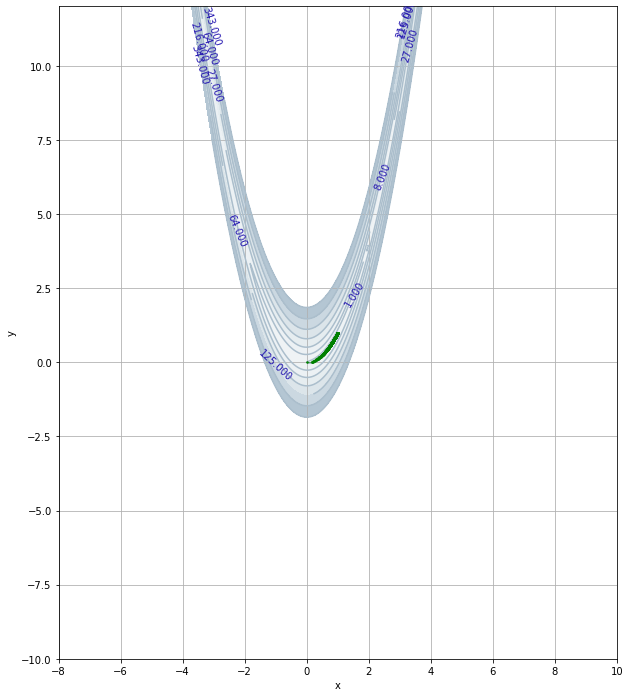


Вычисляю для (x ^ 2 + y - 11) ^ 2 + (x + y ^ 2 - 7) ^ 2:
	dichotomy:
		Ответ: [3.00001326 2.00038846], сошлось за 9 итераций


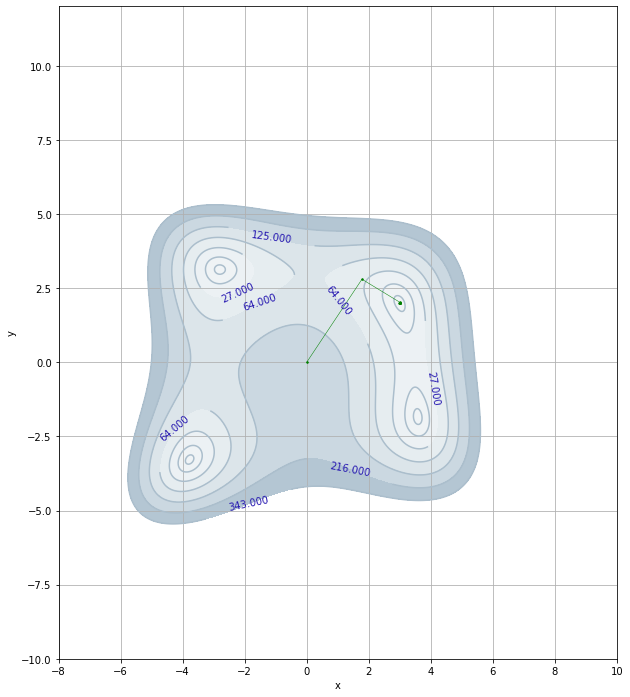


	golden_ratio:
		Ответ: [3.00000738 2.00042188], сошлось за 9 итераций


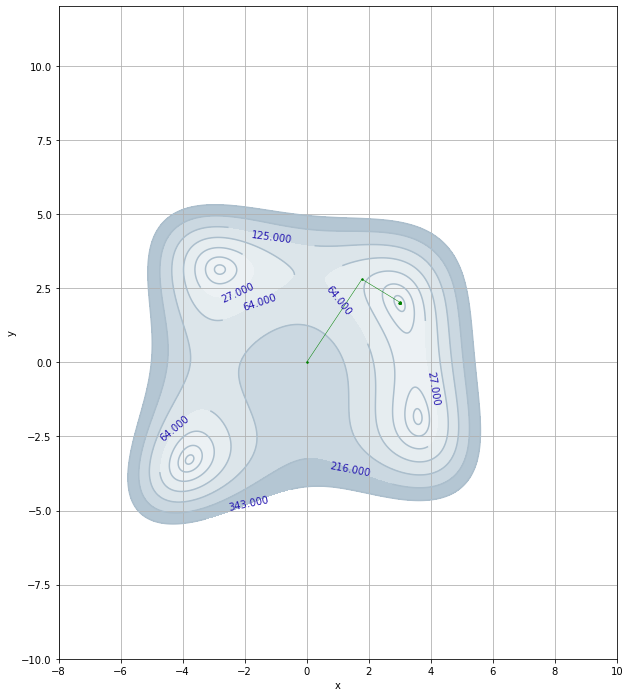


	fibbonacci:
		Ответ: [2.99958108 2.00062743], сошлось за 8 итераций


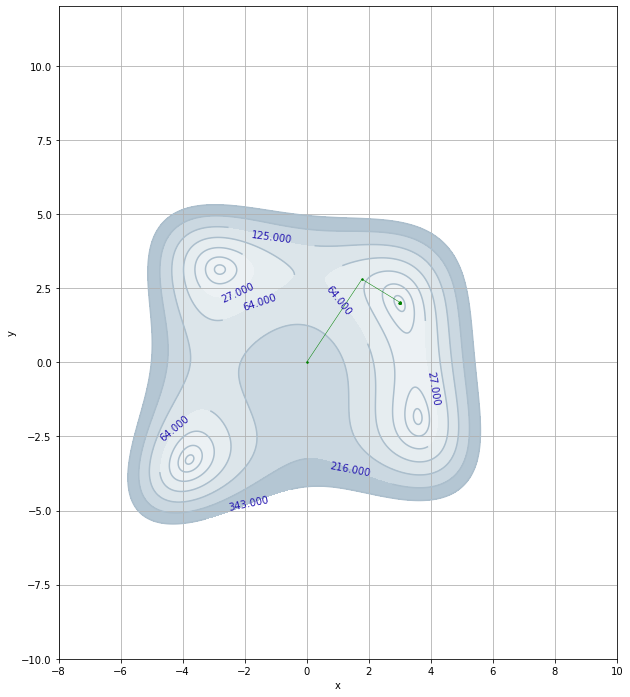

In [ ]:
methods = [dichotomy, golden_ratio, fibonacci]

representations = ["5 * (y - x) ^ 2 + (1 - x) ^ 2",
                   "(100 * (y - x ^ 2) ^ 2 + (1 - x) ^ 2)",
                   "(x ^ 2 + y - 11) ^ 2 + (x + y ^ 2 - 7) ^ 2"]

fs = [lambda x, y: 5 * (y - x) ** 2 + (1 - x) ** 2,
      lambda x, y: 100 * (y - x ** 2) ** 2 + (1 - x) ** 2,
      lambda x, y: (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2]

derivatives = [lambda x, y: np.array([-10 * (y - x) + 2 * x - 2,  10 * (y - x)]),
              lambda x, y: np.array([2 * (-1 + x + 200 * x ** 3 - 200 * x * y),  200 * (-x ** 2 + y)]),
              lambda x, y: np.array([2 * (-7 + x + y ** 2 + 2 * x * (-11 + x ** 2 + y)), 2 * (-11 + x ** 2 + y + 2 * y * (-7 + x + y ** 2))])]

steps = [None]

for repr, f, derivative in zip(representations, fs, derivatives):
    print(f"Вычисляю для {repr}:")
    for method in methods:
        print(f"\t{method.__name__}:")
        for step in steps:
            x, trace = gradient_descent(f, derivative, method, step=step)
            if not np.isnan(x).any():
                print(f'\t\tОтвет: {x}, сошлось за {len(trace)} итераций')
                plot_graph(f, trace, repr, method)
            else:
                print('\t\tФункция не сошлась')
        print()

In [ ]:
def generate_matrix(n, cond_number):
    d = np.sort(np.random.uniform(1, cond_number, n))[::-1]
    d[0], d[-1] = cond_number, 1.
    S = np.diag(d)
    U, _ = LA.qr(np.random.rand(n, n))
    return U @ S @ U.T

def generate_func(n, cond_number):
    A = generate_matrix(n, cond_number)
    assert np.allclose(cond_number, LA.cond(A))
    assert np.allclose(A, A.T)

    def f(*args):
        x = np.array(args)
        return x @ A @ x.T

    def grad(*args):
        x = np.array(args)
        return 2 * A @ x.T

    return f, grad

In [ ]:
cond_numbers = [1, 10, 100, 200]
dims = np.arange(2, 11)

for dim in dims:
    print(f"Размерность {dim}: ")
    for cond_number in cond_numbers:
        f, derivative = generate_func(dim, cond_number)
        print(f"\tЧисло обусловленности = {cond_number}")
        for method in methods:
            print(f"\t\tМетод {method.__name__}:", end="")
            x, trace = gradient_descent(f, derivative, method, dim)
            if not np.isnan(x).any():
                print(f'\t cошлось за {len(trace)} итераций',)
            else:
                print('\tФункция не сошлась')

Размерность 2: 
	Число обусловленности = 1
		Метод dichotomy:	cошлось за 6 итераций	 [2.64609575e-18 2.64609575e-18]
		Метод golden_ratio:	cошлось за 6 итераций	 [1.02650146e-18 1.02650146e-18]
		Метод fibbonacci:	cошлось за 4 итераций	 [-6.88766221e-41 -6.88766221e-41]
	Число обусловленности = 10
		Метод dichotomy:	cошлось за 18 итераций	 [-9.00939761e-12  1.92169724e-11]
		Метод golden_ratio:	cошлось за 18 итераций	 [-6.93169790e-12  1.47903983e-11]
		Метод fibbonacci:	cошлось за 22 итераций	 [-3.1659749e-12  6.7321077e-12]
	Число обусловленности = 100
		Метод dichotomy:	cошлось за 24 итераций	 [ 2.19702220e-11 -4.73547417e-13]
		Метод golden_ratio:	cошлось за 144 итераций	 [ 1.17167548e-09 -2.67809111e-11]
		Метод fibbonacci:	cошлось за 1440 итераций	 [ 3.68830585e-09 -5.00912786e-11]
	Число обусловленности = 200
		Метод dichotomy:	cошлось за 2105 итераций	 [ 5.70958220e-09 -4.85719875e-09]
		Метод golden_ratio:	cошлось за 203 итераций	 [ 1.4320702e-09 -1.2238408e-09]
		Метод fibbon